# Model for the wine quality prediciton

1. Import data

you can find the source file data from this: [uci datasets](https://archive.ics.uci.edu/dataset/186/wine+quality)

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('winequality-red.csv', sep=';')
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

## 2. EDA data

In [3]:
df.iloc[:, :-1].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [4]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## 3. Preprocessing data

In [6]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np

### การจัดกลุ่มข้อมูลคุณภาพไวน์

ในขั้นตอนนี้ เราจะทำการจัดกลุ่มข้อมูลคุณภาพของไวน์ (`quality`) ให้อยู่ในสองกลุ่มหลักคือ 'bad' และ 'good' โดยใช้ฟังก์ชัน `pd.cut()` ของ Pandas

#### อธิบาย:

- **`bins = (2, 5.5, 8)`**: กำหนดช่วงในการแบ่งกลุ่มข้อมูล โดยช่วงที่กำหนดคือ:
  - ค่า `quality` ที่มากกว่า 2 และน้อยกว่าหรือเท่ากับ 5.5 จะถูกจัดให้อยู่ในกลุ่ม 'bad'
  - ค่า `quality` ที่มากกว่า 5.5 และน้อยกว่าหรือเท่ากับ 8 จะถูกจัดให้อยู่ในกลุ่ม 'good'

- **`group_names = ['bad', 'good']`**: กำหนดชื่อกลุ่มที่จะใช้แทนช่วงที่ได้จาก `bins`

- **`pd.cut()`**: ฟังก์ชันนี้ใช้ในการแบ่งข้อมูลออกเป็นกลุ่มตามช่วงที่กำหนดใน `bins` และแทนที่ด้วยชื่อกลุ่มที่กำหนดใน `labels`

หลังจากรันโค้ดนี้ คอลัมน์ `quality` ใน DataFrame จะถูกเปลี่ยนจากค่าตัวเลขให้เป็นกลุ่มที่เรากำหนดไว้ ซึ่งจะช่วยให้เราสามารถวิเคราะห์ข้อมูลได้ง่ายขึ้นในบริบทของการจำแนกประเภทคุณภาพของไวน์


In [7]:
bins = (2, 5.5, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

In [8]:
df['quality'].value_counts()

quality
good    855
bad     744
Name: count, dtype: int64

In [9]:
encoder = LabelEncoder()
df['quality'] = encoder.fit_transform(df['quality'])

- good คือ 1
- bad  คือ 0

In [10]:
df['quality'].value_counts()

quality
1    855
0    744
Name: count, dtype: int64

In [11]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


standardize data

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# ใช้ StandardScaler เพื่อปรับสเกลข้อมูล
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

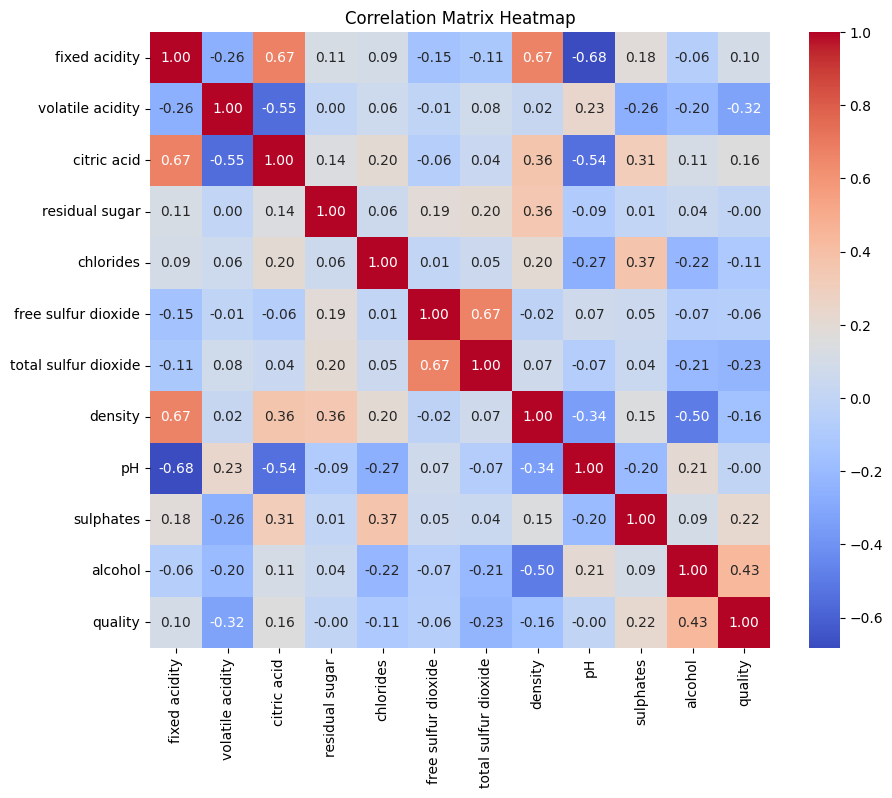

In [13]:


# สร้าง DataFrame จากข้อมูลที่ปรับสเกลแล้ว
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

# คำนวณ correlation matrix
corr_matrix = scaled_df.corr()

# สร้าง heatmap ของ correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

drop quality feature ออก จาก dataset ตัวที่ 1 เพราะมีความสำพันธ์  quality น้อย

In [14]:
scaled_df.drop('quality', axis=1, inplace=True)
scaled_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


ตัด feature ที่ มี corr กับ quality น้อยๆ ออก

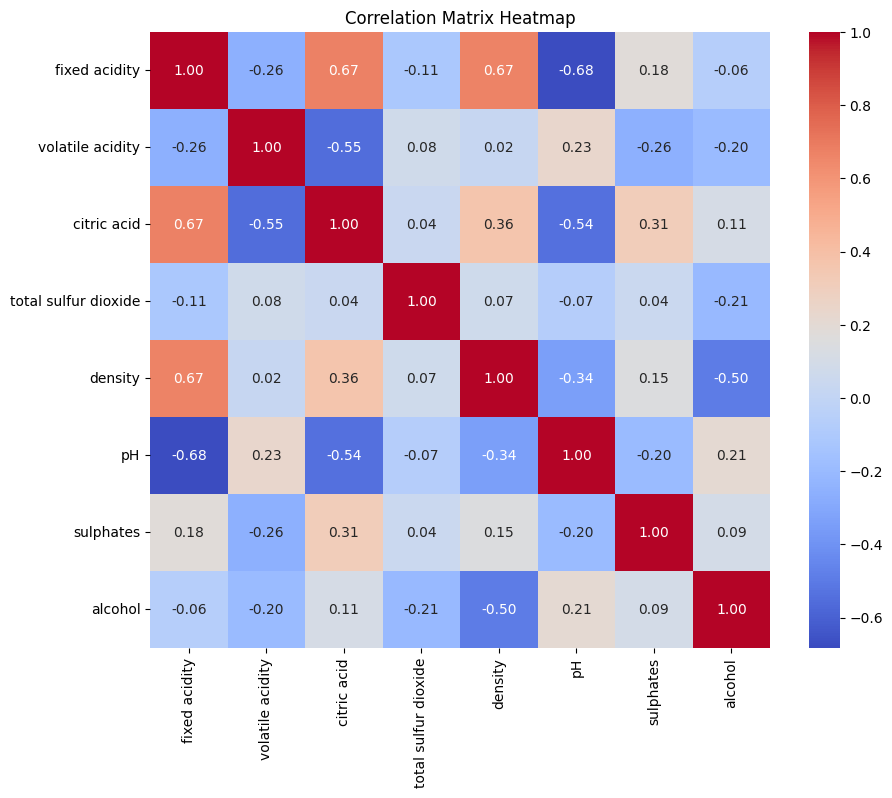

In [15]:
# ตัดฟีเจอร์ที่ไม่ต้องการออก
# สมมติว่าต้องการตัด 'residual sugar', 'chlorides', และ 'free sulfur dioxide'
features_to_drop = ['residual sugar', 'chlorides', 'free sulfur dioxide']
df_reduced = scaled_df.drop(features_to_drop, axis=1)

# คำนวณ correlation matrix
corr_matrix = df_reduced.corr()

# สร้าง heatmap ของ correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [16]:
df_reduced.head()

,fixed acidity,volatile acidity,citric acid,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.379133,0.558274,1.288643,-0.579207,-0.960246


ตัด feature ที่สามารถรวบไปเป็น fixed acidity

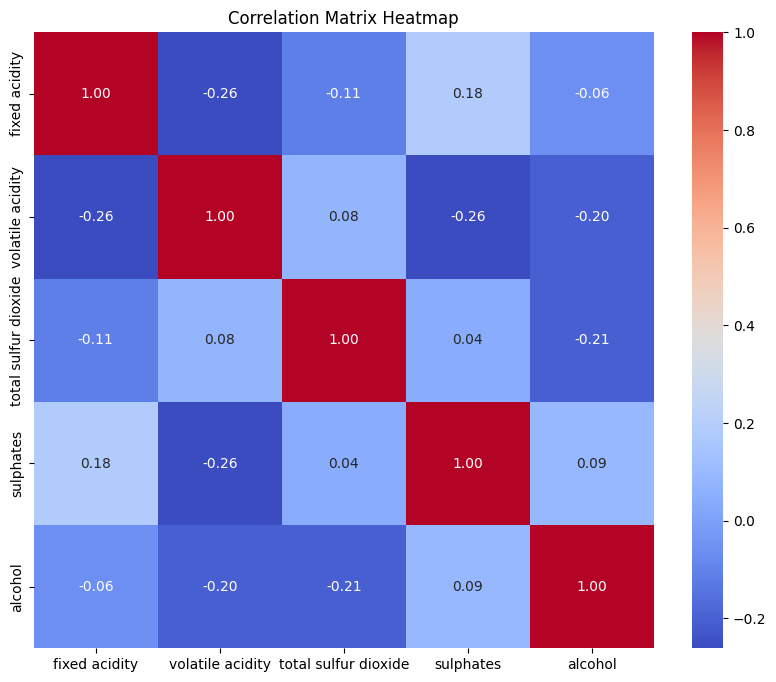

In [17]:
# ตัดฟีเจอร์ที่ไม่ต้องการออก
features_to_drop = ['citric acid', 'density', 'pH']
df_supper_reduced = df_reduced.drop(features_to_drop, axis=1)

# คำนวณ correlation matrix
corr_matrix = df_supper_reduced.corr()

# สร้าง heatmap ของ correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

drop quality feature

In [18]:
print(f'scaled_df: {scaled_df.shape}')
print(f'df_reduced: {df_reduced.shape}')
print(f'df_supper_reduced: {df_supper_reduced.shape}')
scaled_df.head()


scaled_df: (1599, 11)
df_reduced: (1599, 8)
df_supper_reduced: (1599, 5)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


In [19]:
df_reduced.head()


,fixed acidity,volatile acidity,citric acid,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.379133,0.558274,1.288643,-0.579207,-0.960246


In [20]:
df_supper_reduced.head()

,fixed acidity,volatile acidity,total sulfur dioxide,sulphates,alcohol
0,-0.528360,0.961877,-0.379133,-0.579207,-0.960246
1,-0.298547,1.967442,0.624363,0.128950,-0.584777
2,-0.298547,1.297065,0.229047,-0.048089,-0.584777
3,1.654856,-1.384443,0.411500,-0.461180,-0.584777
4,-0.528360,0.961877,-0.379133,-0.579207,-0.960246


In [21]:
df['quality'].head()

0    0
1    0
2    0
3    1
4    0
Name: quality, dtype: int64

# ตอนนี้เราจะมี
- scaled_df         คือ data ที่เเค่ทำ standart scaler ไม่ได้ตัด feature อะไรทิ้งทั้งนั้น
- df_reduced        คือ data ที่ตัด feture ที่มี corr quality น้อยทิ้งไป
- df_supper_reduced คือ df_reduced เเต่ตัดหนักกว่าเดิม ตัด feature เเต่มีการรวบ feature ที่เกี่ยวข้องกันเองสูงๆ ทิ้งไปด้วย

# modeling and evaluate
ทำ cross validation 5 fold


เทียบ dataset ทั้ง 3 ตัว เทียบกับ 3 model

เราจะได้ model ทั้งหมด 9 ตัว มา validate มาเปรียบเทียบกัน

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# เตรียมข้อมูล
X_scaled = scaled_df
X_reduced = df_reduced
X_super_reduced = df_supper_reduced
y = df['quality']

# สร้างฟังก์ชันสำหรับการประเมินผลด้วย Cross-Validation
def cross_validate_model(model, X, y, cv=5):
    scores = cross_val_score(model, X, y, cv=cv, scoring='f1')
    return scores.mean(), scores.std()

# สร้างโมเดล
models = {
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# ประเมินผลลัพธ์สำหรับแต่ละชุดข้อมูล
results = {}
for name, model in models.items():
    results[name] = {
        "Scaled": cross_validate_model(model, X_scaled, y),
        "Reduced": cross_validate_model(model, X_reduced, y),
        "Super Reduced": cross_validate_model(model, X_super_reduced, y)
    }

# แสดงผลลัพธ์
for model_name, result in results.items():
    print(f"Results for {model_name}:")
    for dataset, scores in result.items():
        print(f"  {dataset}: F1 Score Mean = {scores[0]:.2f}, Std Dev = {scores[1]:.2f}")


Results for Naive Bayes:
  Scaled: F1 Score Mean = 0.74, Std Dev = 0.03
  Reduced: F1 Score Mean = 0.72, Std Dev = 0.04
  Super Reduced: F1 Score Mean = 0.75, Std Dev = 0.04
Results for Random Forest:
  Scaled: F1 Score Mean = 0.74, Std Dev = 0.07
  Reduced: F1 Score Mean = 0.73, Std Dev = 0.04
  Super Reduced: F1 Score Mean = 0.75, Std Dev = 0.03
Results for Decision Tree:
  Scaled: F1 Score Mean = 0.66, Std Dev = 0.08
  Reduced: F1 Score Mean = 0.65, Std Dev = 0.04
  Super Reduced: F1 Score Mean = 0.66, Std Dev = 0.03


# การวิเคราะห์ผลลัพธ์ของโมเดล

จากการทดสอบโมเดล Naive Bayes, Random Forest, และ Decision Tree บนชุดข้อมูลที่แตกต่างกันสามชุด (Scaled, Reduced, และ Super Reduced) ได้ผลลัพธ์ดังนี้:
โดยที่ seed คือ 42
## Naive Bayes
- **Scaled**: F1 Score Mean = 0.74, Std Dev = 0.03
- **Reduced**: F1 Score Mean = 0.72, Std Dev = 0.04
- **Super Reduced**: F1 Score Mean = 0.75, Std Dev = 0.04

## Random Forest
- **Scaled**: F1 Score Mean = 0.74, Std Dev = 0.07
- **Reduced**: F1 Score Mean = 0.73, Std Dev = 0.04
- **Super Reduced**: F1 Score Mean = 0.75, Std Dev = 0.03

## Decision Tree
- **Scaled**: F1 Score Mean = 0.66, Std Dev = 0.08
- **Reduced**: F1 Score Mean = 0.65, Std Dev = 0.04
- **Super Reduced**: F1 Score Mean = 0.66, Std Dev = 0.03

## การวิเคราะห์
1. **F1 Score Mean**:
   - **Random Forest** และ **Naive Bayes** ให้ค่า F1 Score Mean สูงสุดที่ 0.75 เมื่อใช้ชุดข้อมูล **Super Reduced** ซึ่งแสดงถึงความสามารถในการจำแนกประเภทได้ดี
   - **Decision Tree** มีค่า F1 Score Mean ต่ำกว่าเมื่อเทียบกับโมเดลอื่นๆ ในทุกชุดข้อมูล

2. **Standard Deviation (Std Dev)**:
   - **Random Forest** มีค่า Std Dev ต่ำที่สุดเมื่อใช้ชุดข้อมูล **Super Reduced** (0.03) แสดงถึงความเสถียรของโมเดลในการทำนาย
   - **Naive Bayes** และ **Decision Tree** มีค่า Std Dev ที่ใกล้เคียงกันในชุดข้อมูล **Super Reduced**

## สรุป
- **Random Forest** และ **Naive Bayes** เป็นโมเดลที่มีประสิทธิภาพสูงที่สุดในชุดข้อมูล **Super Reduced** โดยมีค่า F1 Score Mean เท่ากันที่ 0.75
- อย่างไรก็ตาม **Random Forest** มีความเสถียรมากกว่าเล็กน้อย (Std Dev = 0.03) จึงอาจถือว่าเป็นโมเดลที่ดีที่สุดในกรณีนี้

การเลือกโมเดลที่ดีที่สุดควรพิจารณาทั้งความแม่นยำและความเสถียรของผลลัพธ์ ซึ่งในที่นี้ Random Forest ดูจะเป็นตัวเลือกที่ดี


# save model

In [44]:
import joblib
from sklearn.ensemble import RandomForestClassifier

# ฝึกโมเดล Random Forest ด้วยชุดข้อมูล Super Reduced
rf_model_super_reduced = RandomForestClassifier(random_state=42)
rf_model_super_reduced.fit(X_super_reduced, y)

# บันทึกโมเดลด้วย joblib
joblib_file = "./models/random_forest_super_reduced_model.pkl"
joblib.dump(rf_model_super_reduced, joblib_file)

print(f"Model saved to {joblib_file}")


Model saved to ./models/random_forest_super_reduced_model.pkl


## Testing the loaded model

In [45]:
import joblib
from sklearn.metrics import classification_report, accuracy_score

# โหลดโมเดลที่บันทึกไว้
joblib_file = "./models/random_forest_super_reduced_model.pkl"
rf_model_super_reduced = joblib.load(joblib_file)

# ใช้โมเดลในการพยากรณ์
predictions = rf_model_super_reduced.predict(X_super_reduced)
print(f'shape of input data {X_super_reduced.shape}')

# ประเมินผลลัพธ์
accuracy = accuracy_score(y, predictions)
report = classification_report(y, predictions)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)

predictions = rf_model_super_reduced.predict([[1,1,1,1,1],[9999,9999,9999,9999,9999]])
predictions


shape of input data (1599, 5)
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       744
           1       1.00      1.00      1.00       855

    accuracy                           1.00      1599
   macro avg       1.00      1.00      1.00      1599
weighted avg       1.00      1.00      1.00      1599



c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1, 0])

ที่ model มีความเเม่นยำเเบบ 1 หมด เพราะว่าผมเอา data ที่ train มาทดสอบมันอีกรอบ เพื่อ check ว่ามันคือ model ที่เราได้ train ไปเเล้วจริงๆ 